In [1]:
import networkx as nx
import random
def generateSimpleBollobasRiordanGraph(n):
    G = nx.MultiDiGraph()
    G.add_node(0)
    G.add_edge(0, 0)
    # список всех вершин графа, каждая из них входит в него в количестве, равном её степени
    repeated_nodes = [0, 0]
    while G.number_of_nodes() < n:
        new_node = G.number_of_nodes()
        G.add_node(new_node)
        # для возможности петли
        repeated_nodes.append(new_node)
        # выбираем конец ребра пропорционально степени вершины
        destination = random.choice(repeated_nodes)
        repeated_nodes.append(destination)
        G.add_edge(new_node, destination)
    return G

In [2]:
def generateBollobasRiordanGraph(n, m):
    G1mn = generateSimpleBollobasRiordanGraph(m * n)
    G = nx.MultiDiGraph()
    # объединяем вершины в последовательные группы по m: {0,...,m-1}, {m, ..., 2m-1}, ..., {m(n-1), ..., mn - 1}
    for u, v in G1mn.edges():
        u_new, v_new = u / m, v / m
        G.add_edge(u_new, v_new)
    return G

In [4]:
G = generateBollobasRiordanGraph(10000, 2)
print G.number_of_nodes()
print G.number_of_edges()

10000
20000


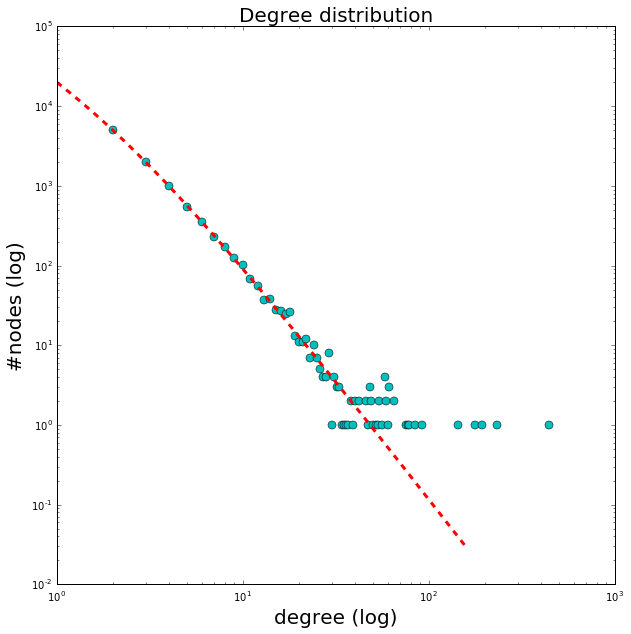

In [13]:
import matplotlib.pyplot as plt
import pylab
import numpy as np
from collections import Counter

# Рисуем графики не создавая новых окон
%matplotlib inline

def degree_estimation(d, m, n):
    return 2 * (m + 1) * m * n / d / (d + 1) / (d + 2)

N = 10000
M = 2
# размер графика
pylab.rcParams['figure.figsize'] = 10, 10
# генерация графа
G = generateBollobasRiordanGraph(N, M)
degrees = Counter(nx.degree(G).values())
sorted_degree_values = sorted(degrees.keys())
counts = [degrees[d] for d in sorted_degree_values]
# рисуем точками в log-log координатах распределение степеней
plt.loglog(sorted_degree_values, counts, ls='None', marker='o', markersize=8, color='c')
# считаем теоретическое распределение
degree_values = np.arange(1, max(G.degree().values()) + 1, 0.2)[:800]
theoretical_values = [degree_estimation(d, M, N) for d in degree_values]
plt.loglog(degree_values, theoretical_values, color='r', ls='--', lw=3)
plt.title("Degree distribution", fontsize=20)
plt.ylabel("#nodes (log)", fontsize=20)
plt.xlabel("degree (log)", fontsize=20)
plt.show()
